# World's Gross Domestic Product (GDP) Analysis from 2001-2018
## by Hassanat Awodipe

## Investigation Overview

I am interested in looking at the world's GDP as a whole. I want to understand how the positive correlation between Population and GDP is affected by inflation and how GDP Per Capita varies with Income Class and Regions.

## Dataset Overview

The dataset contained 3,072 observations of economic features from 172 unique countries. These features include exports, imports, gross national savings and expendtiure, total natural resources rents and inflation. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
economy = pd.read_excel('WorldSustainabilityDataset-Economy.xlsx')

In [3]:
# create an order for the income class
income_class = ['High income', 'Upper-middle income', 'Lower-middle income', 'Low income']
income_order = pd.api.types.CategoricalDtype(ordered=True, categories=income_class)
economy['Income Class'] = economy['Income Class'].astype(income_order)

# choose a uniform color for the bars
base_color = sb.color_palette()[0]

## Distribution of GDP

GDP has a long tail with a lot of smaller values and just a few values on the high side. When plotted on a log scale, the distribution appears to be normal with the highest count of GDPs in 10B range. 

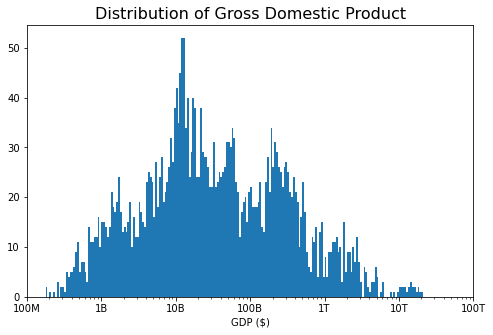

In [148]:
# adjust the scale to a log scale
plt.figure(figsize=[8, 5])

log_binsize = 0.025
bins = 10 ** np.arange(0.9, np.log10(economy['GDP'].max())+log_binsize, log_binsize)

plt.hist(economy['GDP'], bins=bins)
plt.xscale('log')
plt.xlim(10**8, 10**14)
plt.xticks([10**8, 10**9, 10**10, 10**11, 10**12, 10**13, 10**14], ['100M', '1B', '10B', '100B', '1T', '10T', '100T'])
plt.xlabel('GDP ($)')
plt.title('Distribution of Gross Domestic Product', fontsize=16)

plt.show()

## Growth of GDP and Population from 2001 - 2018

Since 2001, there has been a rise in GDP. Slight drops occurred in 2009 and 2015. There was also an increase in population from 2001 to 2018 although there were slight drops in 2008 and 2015. The effect of these drops can also be seen in the GDP.

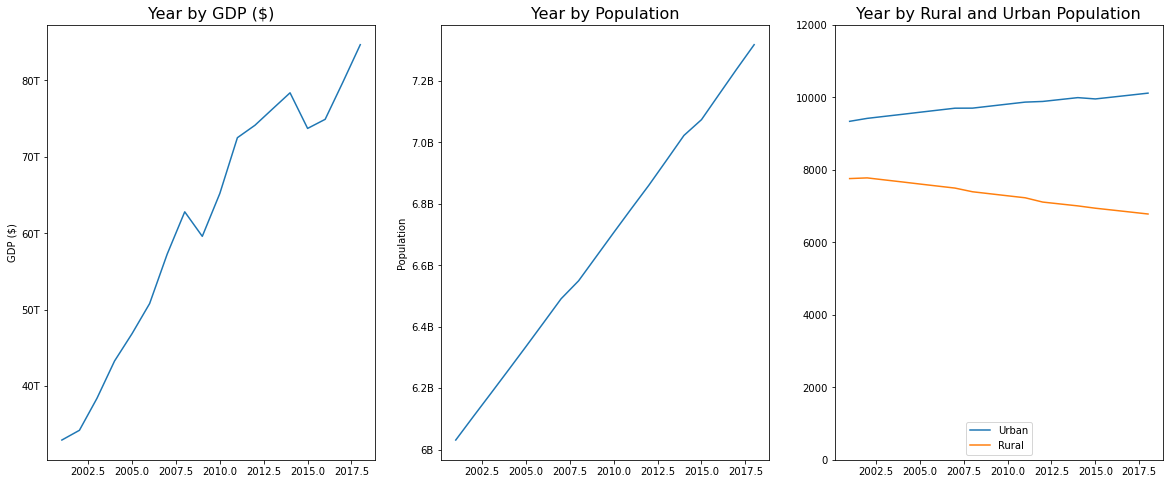


By examining based on Rural and Urban Population, we can see that the specific increase in urban population maybe
related to that of GDP. Also interesting to see that the migration from Rural areas to Urban areas continues to grow.


In [265]:
# comparison of GDP and Population Growth
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.plot(economy.groupby(['Year'])['GDP'].sum())
plt.title('Year by GDP ($)', fontsize=16)
plt.yticks([4*10**13, 5*10**13, 6*10**13, 7*10**13, 8*10**13], 
            ['40T', '50T', '60T', '70T', '80T'])
plt.ylabel('GDP ($)')

plt.subplot(1, 3, 2)
plt.plot(economy.groupby(['Year'])['Population'].sum())
plt.title('Year by Population', fontsize=16)
plt.yticks([6.0*10**9, 6.2*10**9, 6.4*10**9, 6.6*10**9, 6.8*10**9, 7.0*10**9, 7.2*10**9], 
            ['6B', '6.2B', '6.4B', '6.6B', '6.8B', '7.0B', '7.2B'])
plt.ylabel('Population')

plt.subplot(1, 3, 3)
plt.plot(economy.groupby(['Year'])['Urban population'].sum(), label='Urban')
plt.plot(economy.groupby(['Year'])['Rural population'].sum(), label='Rural')
plt.ylim(0, 12000)
plt.title('Year by Rural and Urban Population', fontsize=16)
plt.legend(loc='lower center')

plt.show()

print('''
By examining based on Rural and Urban Population, we can see that the specific increase in urban population maybe
related to that of GDP. Also interesting to see that the migration from Rural areas to Urban areas continues to grow.''')

## Close Examination of the Fall of GDP in 2015

The outliers for maximum GDP values continued to increase on a yearly basis. From 2010 to 2014, there was a steady rise in GDP. In 2015, a clear drop occured in the maximum and median values of GDP. The GDP rose again in 2017.

In [39]:
# subset the data for the years from 2010
gdp_year = economy[economy['Year'] > 2009]

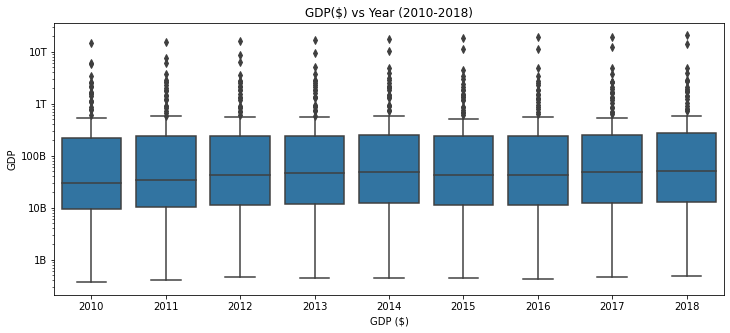

In [106]:
# use a log scale for the GDP axis
plt.figure(figsize=(12,5))

sb.boxplot(data=gdp_year, x='Year', y='GDP', color=base_color);

plt.yscale('log') 
plt.yticks([ 10**9, 10**10, 10**11, 10**12, 10**13], ['1B', '10B', '100B', '1T', '10T']);
plt.xlabel('GDP ($)')
plt.title('GDP($) vs Year (2010-2018)');

## GDP and Population by Inflation

Inflation had the strongest negative correlation with GDP. In addition, there were a lot of negative inflation points in 2015 and 2016 this could have led to the GDP dropping. With data from just 2010, I compare GDP, Population and Inflation.

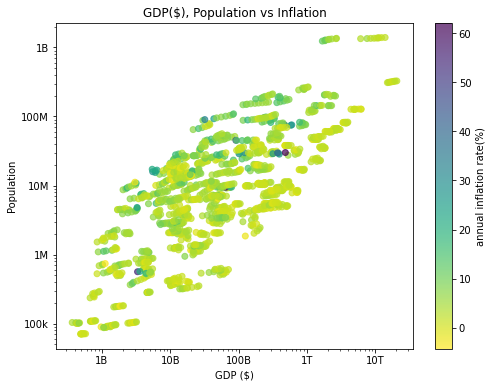

In points of high inflation, the GDP is low even when Population is constant.


In [101]:
# scatter plot to see how the inflation varies with GDP and Population. 
plt.figure(figsize=(8,6)) 

plt.scatter(data=gdp_year,  x='GDP', y='Population', c='Inflation', cmap='viridis_r', alpha=0.7)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('GDP ($)')
plt.ylabel('Population')
plt.xticks([10**9, 10**10, 10**11, 10**12, 10**13], ['1B', '10B', '100B', '1T', '10T'])
plt.yticks([10**5, 10**6, 10**7, 10**8, 10**9], ['100k', '1M', '10M', '100M', '1B'])

plt.colorbar(label='annual inflation rate(%)')
plt.title('GDP($), Population vs Inflation')

plt.show()

print('In points of high inflation, the GDP is low even when Population is constant.')

## GDP and Population Distribution by Regions

Here we see that some of the regions with high GDP values do not have a high number of population. Narrow violin plots indicate that the distribution of that region across that GDP value is very small.

In [ ]:
# create an order for the regions
reg_order = economy.groupby(['Regions'])['GDP'].max().sort_values(ascending=False).index
mean_pop_order = economy.groupby(['Regions'])['Population'].max().sort_values(ascending=False).index

In [257]:
def plot_violin(cat_var, order):
    
    fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
    
    if order:
        sb.violinplot(data=economy, y=cat_var, x='GDP', inner=None, ax = ax[0], color=base_color, order=reg_order)
    else:  
        sb.violinplot(data=economy, y=cat_var, x='GDP', inner=None, ax = ax[0], color=base_color)
        ax[1].set_yticklabels([])
    ax[0].set_xscale('log')
    ax[0].set_xticks([1e9, 1e10, 1e11, 1e12, 1e13])
    ax[0].set_xticklabels(['1B', '10B', '100B', '1T', '10T'])
    
    if order:
        sb.violinplot(data=economy, y=cat_var, x='Population', inner=None, ax = ax[1], color=base_color, order=mean_pop_order)
    else:
        sb.violinplot(data=economy, y=cat_var, x='Population', inner=None, ax = ax[1], color=base_color)
        ax[1].set_yticklabels([])
    ax[1].set_xscale('log')
    ax[1].set_xticks([1e6, 1e7, 1e8, 1e9])
    ax[1].set_xticklabels(['1M', '10M', '100M', '1B'])
    ax[1].set_ylabel("")
    
    
    plt.suptitle('{} vs GDP($) and Population '.format(cat_var), fontsize=16)
    plt.tight_layout()
    plt.show()
    return

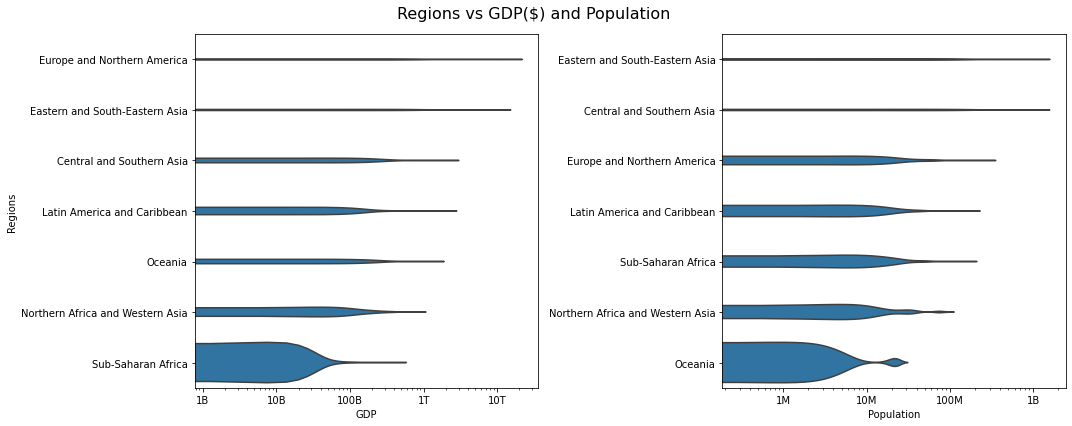

In [255]:
plot_violin('Regions', order=True)

## GDP and Population Distribution by Income Class

The violin plots here are less narroe. We see that as the GDP value for high income increases, the distribution gets smaller. Considering the four classes, the distribution becomes more and Low income has the highest number of points. 

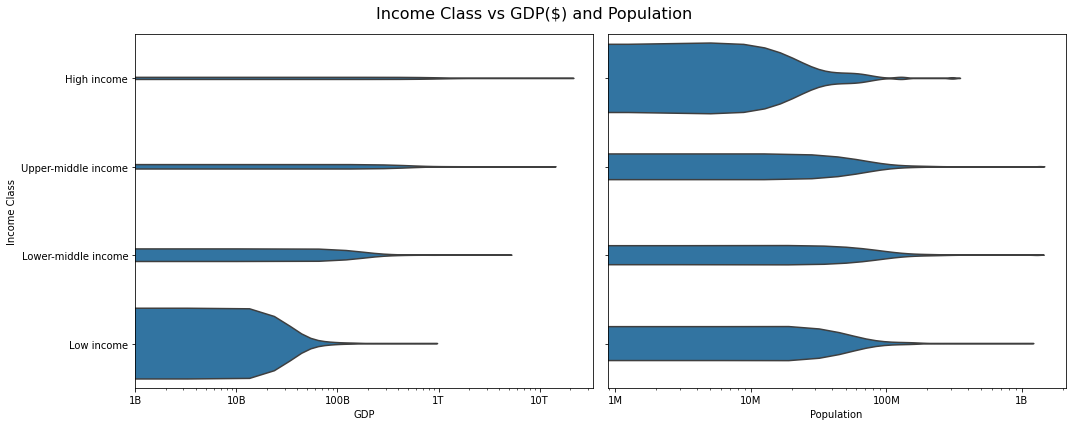

In [258]:
plot_violin('Income Class', order=False)

## GDP Per Capita

Oceania is the region with the second highest GDP Per Capita despite having the lowest number of observations in the dataset. Conversly, Eastern and South-Eastern Asia is the region with the the highest population observations but  and it has the third highest GDP Per Capita. This shows that high GDP is not entirely dependent on increase in population.
The average GDP Per Capita for the income classes have a close range excluding the high income class. 

In [140]:
# derive the GDP Per Capita for each country and find the distribution.
economy['GDP Per Capita'] = economy['GDP'] / economy['Population']

In [142]:
region_order = economy.groupby(['Regions','Income Class'])['GDP Per Capita'].mean().reset_index()
region_order = region_order[region_order['Income Class'] == 'High income']
region_order = region_order.sort_values('GDP Per Capita', ascending=False)
region_order = region_order['Regions']

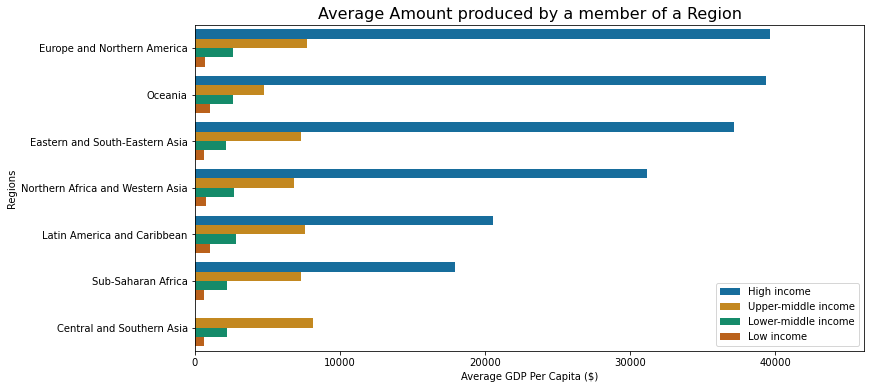


Central and Southern Asia has no population of high income but has the second highest number of observations 
in the datset.


In [264]:
plt.figure(figsize=(12,6))

sb.barplot(data=economy, y='Regions', x='GDP Per Capita', hue='Income Class', errwidth=0,
           palette='colorblind', order=region_order) 
plt.xlabel('Average GDP Per Capita ($)')
plt.title('Average Amount produced by a member of a Region', fontsize=16)
plt.legend(loc='lower right')

plt.show()
print('''
Central and Southern Asia has no population of high income but has the second highest number of observations 
in the datset.''')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert World_GDP_Analysis_slides.ipynb --to slides --post serve --no-input --no-prompt